# predicting who will buy insurance

In [ ]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [11]:
from sklearn import linear_model

In [5]:
df=pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [6]:
X=df[["age"]]
X

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [7]:
y=df["bought_insurance"]
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

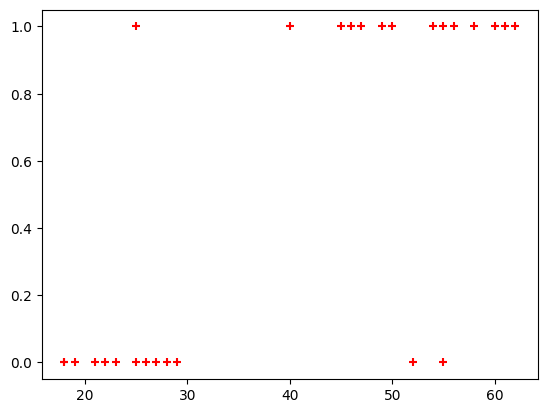

In [9]:
plt.scatter(X,y,color="red",marker="+")

In [12]:
reg=linear_model.LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [13]:
reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [14]:
reg.predict_proba(X_test)

array([[0.09891235, 0.90108765],
       [0.14037365, 0.85962635],
       [0.86549617, 0.13450383],
       [0.7625386 , 0.2374614 ],
       [0.72473242, 0.27526758],
       [0.78004741, 0.21995259],
       [0.28525576, 0.71474424],
       [0.74409329, 0.25590671],
       [0.22856665, 0.77143335]])

In [15]:
reg.score(X_test,y_test)

1.0

# predicting who will leave the company

In [16]:
df=pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [17]:
df["left"].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [18]:
df1=df.drop(["Department","salary"],axis="columns")
df1.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [19]:
df2= df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df2

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [20]:
dummies=pd.get_dummies(df["salary"])
dummies.head(50)

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
5,False,True,False
6,False,True,False
7,False,True,False
8,False,True,False
9,False,True,False


In [21]:
merge=pd.concat([df2,dummies],axis="columns")
merge

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,False,True,False
14995,0.37,160,0,low,False,True,False
14996,0.37,143,0,low,False,True,False
14997,0.11,280,0,low,False,True,False


In [22]:
merge=merge.drop("salary",axis="columns")

In [23]:
X=merge
X

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False
...,...,...,...,...,...,...
14994,0.40,151,0,False,True,False
14995,0.37,160,0,False,True,False
14996,0.37,143,0,False,True,False
14997,0.11,280,0,False,True,False


In [24]:
y=df.left

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
model.score(X_test,y_test)

0.762

In [32]:
from sklearn.metrics import classification_report, accuracy_score

In [33]:
y_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.762